# Análisis bioinformático del gen NRAMP5 en plantas

Proyecto final – Herramientas Bioinformáticas  
Análisis basado en secuencias de aminoácidos

In [2]:
!apt-get install -qq mafft
!pip install biopython

Extracting templates from packages: 100%
Selecting previously unselected package fonts-lato.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../00-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package libclone-perl.
Preparing to unpack .../02-libclone-perl_0.45-1build3_amd64.deb ...
Unpacking libclone-perl (0.45-1build3) ...
Selecting previously unselected package libdata-dump-perl.
Preparing to unpack .../03-libdata-dump-perl_1.25-1_all.deb ...
Unpacking libdata-dump-perl (1.25-1) ...
Selecting previously unselected package libencode-locale-perl.
Preparing to unpack .../04-libencode-locale-perl_1.05-1.1_all.deb ...
Unpacking libencode-locale-perl (1.05-1.1) ...
Selecting previously unselected package libhttp-date-perl.
Preparing to unpack .../05-libhttp-date-perl

In [3]:
from google.colab import files
uploaded = files.upload()

Saving nramp5_proteins.fasta to nramp5_proteins.fasta


In [4]:
from Bio import SeqIO

for record in SeqIO.parse("nramp5_proteins.fasta", "fasta"):
    print(record.id, len(record.seq))

Tr_Nramp5_Trifolium_repens 545
At_NRAMP5_Arabidopsis_thaliana 530
Osj_Nramp5_Oryza_sativa_Japonica 538
PeNramp5_Phalaenopsis_equestris 547
PzNramp5_Platanthera_zijinensis 473
ZmNramp5_Zea_mays 557
NaNramp5_Nicotiana_attenuata 535
MtNramp5_Medicago_truncatula 542
TcNramp5_Theobroma_cacao 557
StNramp5-like_Solanum_tuberosum 530


In [5]:
!mafft --auto nramp5_proteins.fasta > nramp5_aligned.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.490
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 10
done.

Progressive alignment ... 
STEP     7 /9 
Reallocating..done. *alloclen = 2127
STEP     9 /9 
done.
tbfast (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 10
Segment   1/  1    1- 597
STEP 003-008-1  identical.   
Converged.

done
dvtditr (aa) Version 7.490
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy

In [6]:
from Bio import AlignIO

alignment = AlignIO.read("nramp5_aligned.fasta", "fasta")
print("Número de secuencias:", len(alignment))
print("Longitud del alineamiento:", alignment.get_alignment_length())

Número de secuencias: 10
Longitud del alineamiento: 596


In [7]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

<Figure size 1000x600 with 0 Axes>

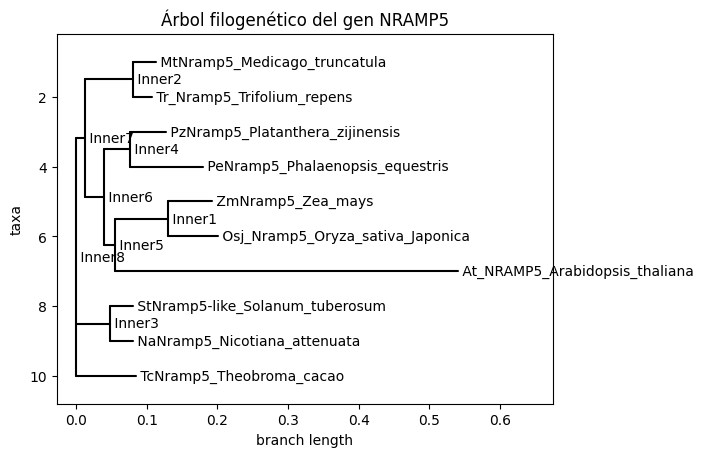

In [8]:
plt.figure(figsize=(10,6))
Phylo.draw(tree, do_show=False)
plt.title("Árbol filogenético del gen NRAMP5")
plt.savefig("nramp5_tree.png", dpi=300)
plt.show()

In [9]:
files.download("nramp5_aligned.fasta")
files.download("nramp5_tree.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>